In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [11]:
# Încărcarea setului de date
df = pd.read_csv('dataset\\gym_members.csv')

# Explorarea dimensiunii setului de date
print("Shape of the dataset:", df.shape)

# Verificarea primelor câteva rânduri
print(df.head())

# Verificarea informațiilor despre setul de date
df.info()

# Verificarea statisticilor descriptive
df.describe()

# Verificarea valorilor lipsă
df.isnull().sum()


Shape of the dataset: (973, 15)
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Exp

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

# Identificăm coloanele de tip string (categorice)
categorical_columns = df.select_dtypes(include=['object']).columns

# Aplicăm codificarea LabelEncoder pentru fiecare coloană categorică
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Verificăm din nou setul de date după transformări
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


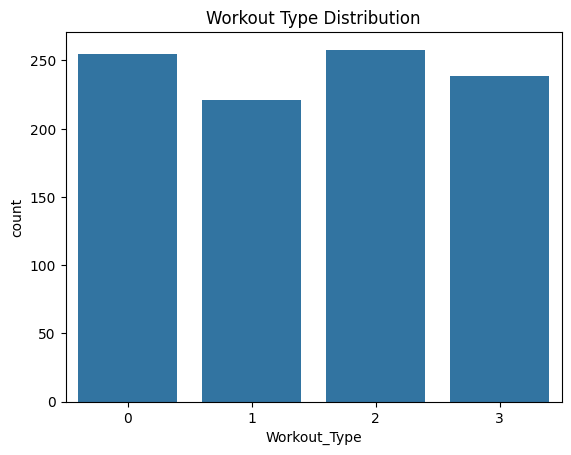

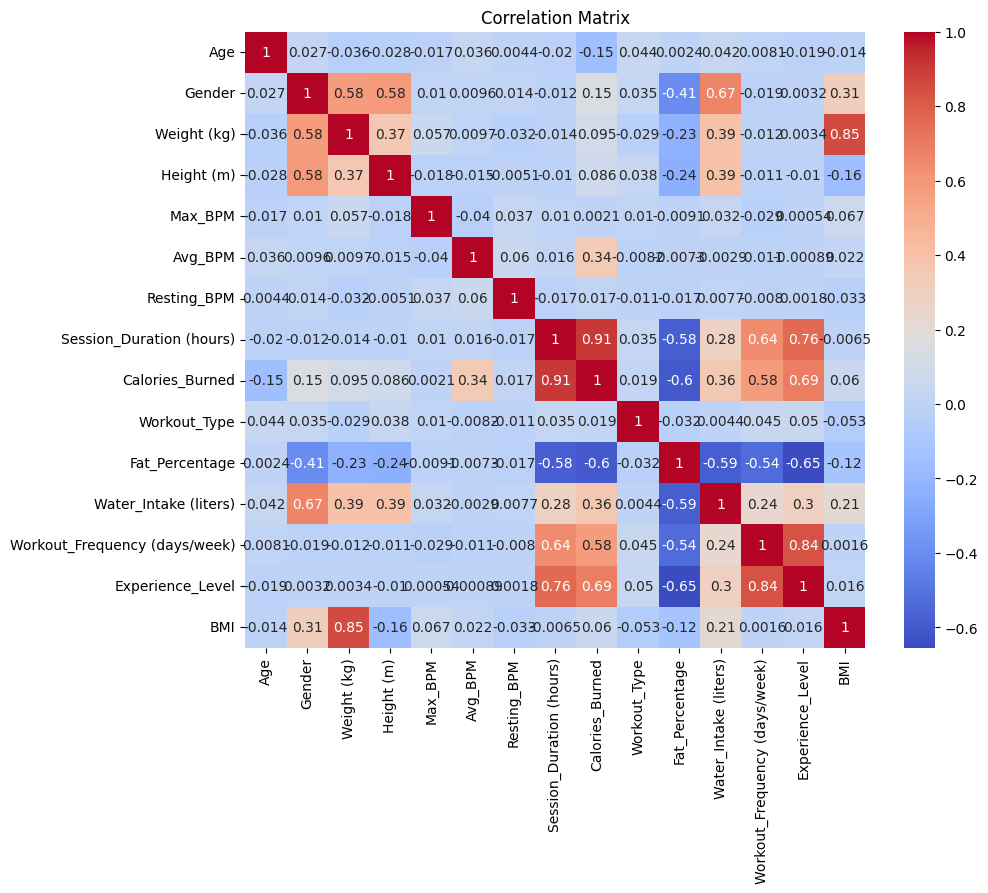

In [13]:
# Vizualizarea distribuției pentru fiecare tip de antrenament
sns.countplot(x='Workout_Type', data=df)
plt.title('Workout Type Distribution')
plt.show()

# Analiza corelațiilor dintre caracteristici
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [14]:
# Separarea variabilelor explicative de variabila dependentă
X = df[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM']]  # Caracteristicile
y = df['Workout_Type']  # Variabila țintă

# Împărțirea setului de date în antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Crearea și antrenarea modelului de arbore de decizie
mdel = DecisionTreeClassifier(random_state=1984)
model.fit(X_train, y_train)

# Prezicerea valorilor pe setul de testare
y_pred = model.predict(X_test)


Acuratețea modelului de arbore de decizie: 0.2671232876712329


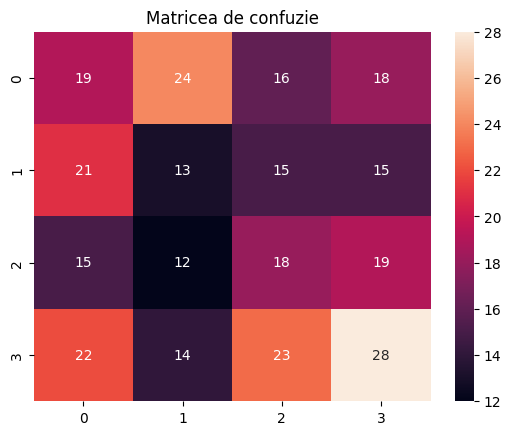

              precision    recall  f1-score   support

           0       0.25      0.25      0.25        77
           1       0.21      0.20      0.20        64
           2       0.25      0.28      0.26        64
           3       0.35      0.32      0.34        87

    accuracy                           0.27       292
   macro avg       0.26      0.26      0.26       292
weighted avg       0.27      0.27      0.27       292



In [16]:
# Evaluarea acurateței modelului
accuracy = accuracy_score(y_test, y_pred)
print("Acuratețea modelului de arbore de decizie:", accuracy)

# Matricea de confuzie
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Matricea de confuzie')
plt.show()

# Raportul de clasificare
print(classification_report(y_test, y_pred))


Cei mai buni parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Acuratețea modelului optimizat: 0.23972602739726026


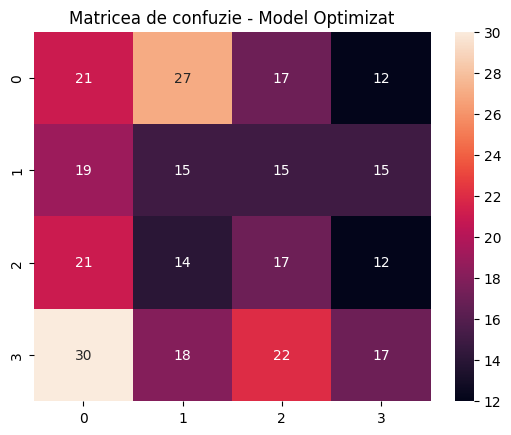

              precision    recall  f1-score   support

           0       0.23      0.27      0.25        77
           1       0.20      0.23      0.22        64
           2       0.24      0.27      0.25        64
           3       0.30      0.20      0.24        87

    accuracy                           0.24       292
   macro avg       0.24      0.24      0.24       292
weighted avg       0.25      0.24      0.24       292



In [17]:
from sklearn.model_selection import GridSearchCV

# Definirea intervalului de hiperparametri
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Crearea unui model de arbore de decizie cu GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afișarea celor mai buni parametri
print("Cei mai buni parametri:", grid_search.best_params_)

# Antrenarea modelului optimizat
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Evaluarea modelului optimizat
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print("Acuratețea modelului optimizat:", optimized_accuracy)

# Matricea de confuzie pentru modelul optimizat
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d')
plt.title('Matricea de confuzie - Model Optimizat')
plt.show()

# Raportul de clasificare pentru modelul optimizat
print(classification_report(y_test, y_pred_optimized))


Acuratețea modelului optimizat: 0.2363013698630137


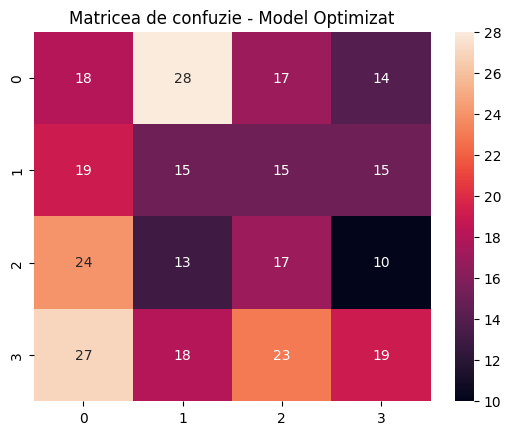

              precision    recall  f1-score   support

           0       0.20      0.23      0.22        77
           1       0.20      0.23      0.22        64
           2       0.24      0.27      0.25        64
           3       0.33      0.22      0.26        87

    accuracy                           0.24       292
   macro avg       0.24      0.24      0.24       292
weighted avg       0.25      0.24      0.24       292



In [18]:
# Crearea și antrenarea modelului de arbore de decizie cu parametrii optimizați
optimized_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=None, 
    min_samples_leaf=4, 
    min_samples_split=2, 
    random_state=1984
)

# Antrenarea modelului pe setul de date de antrenament
optimized_model.fit(X_train, y_train)

# Prezicerea valorilor pe setul de testare
y_pred_optimized = optimized_model.predict(X_test)

# Acuratețea modelului optimizat
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print("Acuratețea modelului optimizat:", optimized_accuracy)

# Matricea de confuzie pentru modelul optimizat
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d')
plt.title('Matricea de confuzie - Model Optimizat')
plt.show()

# Raportul de clasificare pentru modelul optimizat
print(classification_report(y_test, y_pred_optimized))